In [1]:
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup as bs
import nltk
import os
from wordcloud import WordCloud

In [2]:
#Extracting reviews 
shoes_reviews = []
for i in range(1,30):
    shoes = []
    url = "https://www.amazon.in/Bourge-Vega-5-Running-Shoes-3-Vega-5-03/product-reviews/B08CKTXXBW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content, "html.parser")
    reviews = soup.find_all("span", {"data-hook":"review-body"})
    for i in range(len(reviews)):
        shoes.append(reviews[i].text)
    shoes_reviews = shoes_reviews+shoes

In [3]:
#saving extracted data
with open("shoes.txt", "w", encoding = 'utf-8') as output:
    output.write(str(shoes_reviews))

In [4]:
import os
os.getcwd()

'C:\\Users\\imran 46'

In [5]:
#Joining all the reviews into single paragraph
shoes_rev_str = " ".join(shoes_reviews)

In [6]:
shoes_rev_str

'\n\n  They are good for walking but definitely not for running. Look wise they are great.  comfortable in wearing for long hours and you will surely love its foam padding.Got it for Rs 499/-.\n\n \n\n  Value for money ...in this price its a very good product  light weight and grippy ....And it have memory foam too..\n\n \n\n  good quality... premium finish... price worthy\n\n \n\n  This is too good to buyWorth the moneyIt has memory foam😍Thank you team 😊\n\n \n\n  Perfect quality\n\n \n\n  The product is good to see and I hope quality might also goodAnd the shoe is very comfortable to walk it has sponge .So really good and perfectAnd the product is perfect but the box is not satisfied is already torn before I open, but no problem the shoe is good.\n\n \n\n  good\n\n \n\n  One of the Nice shoes in rage\n\n \n\n  This is day one with these shoesFirst impression of it was good but after trying them it became awesome 😘😋😛Some helpful key features1- Light weight2- Fitting is really nice3- C

In [7]:
#Removing unwanted symbols
shoes_rev_str = re.sub("[^A-Za-z" "]+"," ",shoes_rev_str).lower()
shoes_rev_str = re.sub("[0-9" "]+"," ", shoes_rev_str)

In [8]:
shoes_rev_str

' they are good for walking but definitely not for running look wise they are great comfortable in wearing for long hours and you will surely love its foam padding got it for rs value for money in this price its a very good product light weight and grippy and it have memory foam too good quality premium finish price worthy this is too good to buyworth the moneyit has memory foam thank you team perfect quality the product is good to see and i hope quality might also goodand the shoe is very comfortable to walk it has sponge so really good and perfectand the product is perfect but the box is not satisfied is already torn before i open but no problem the shoe is good good one of the nice shoes in rage this is day one with these shoesfirst impression of it was good but after trying them it became awesome some helpful key features light weight fitting is really nice comfortable level shoes grip nice no need to worry about it tried it on hd floor tiles overall best very very soft interiors g

In [9]:
#Now splitting the words as individual string
shoes_reviews_words = shoes_rev_str.split(" ")

In [10]:
#Removing the stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\imran
[nltk_data]     46\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
shoes_reviews_words = [w for w in shoes_reviews_words if not w in stop_words]

In [12]:
shoes_rev_str = " ".join(shoes_reviews_words)

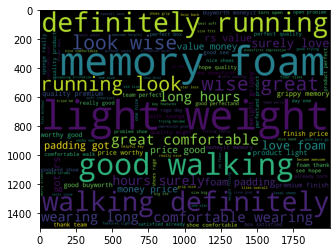

In [13]:
#Now creating wordcloud
wordcloud_shoes = WordCloud(background_color = 'black', width = 2000, height = 1500).generate(shoes_rev_str)
plt.imshow(wordcloud_shoes)

In [14]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [15]:
negwords =negwords[37:]

In [16]:
##Considering only the words which are present in the positive words

red_pos = " ".join([w for w in shoes_rev_str if w in negwords])

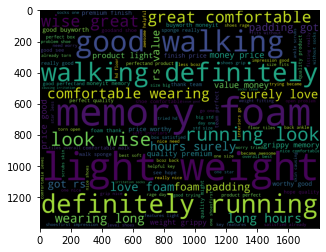

In [17]:
##Building Positive word cloud
wordcloud_pos = WordCloud(background_color='black',width=1800,height=1400).generate(shoes_rev_str)
plt.imshow(wordcloud_pos)

In [18]:
##Unique words
red_unique = list(set(" ".join(shoes_reviews).split(" ")))

In [19]:
red_unique

['',
 'floor',
 'worry',
 '499/-.\n\n',
 'With',
 'nice3-',
 'shoe',
 'problem',
 'irritation.',
 'socks.One',
 'this',
 'quality\n\n',
 'issue.\n\n',
 'Perfect',
 'its',
 'satisfied',
 'Nice',
 'day',
 'This',
 'fits',
 'features1-',
 'Very',
 'good\n\n',
 'quality...',
 'will',
 'team',
 'shoesFirst',
 'causing',
 'too..\n\n',
 'skin',
 'one',
 'overall',
 'surely',
 '😊\n\n',
 '...in',
 'them',
 'finish...',
 'interiors.',
 '....And',
 'Value',
 'hours',
 'rage\n\n',
 'trying',
 'about',
 'key',
 'grip',
 'quality',
 'but',
 'premium',
 'perfect',
 'you',
 'became',
 'the',
 'and',
 'hd',
 'price',
 'good',
 'definitely',
 'ankle',
 'with',
 'hope',
 'after',
 'The',
 'padding.Got',
 'weight2-',
 'bcoz',
 'impression',
 'They',
 'foam😍Thank',
 'helpful',
 'of',
 'scrubs',
 '(no',
 '\n\n',
 'sponge',
 'my',
 'long',
 'open,',
 'best\n\n',
 'Fitting',
 'might',
 'star',
 'an',
 'a',
 'grippy',
 'Comfortable',
 'good.\n\n',
 'shouldn’t',
 'not',
 'was',
 'awesome',
 'weight',
 'great.',

# Emotion Mining

In [20]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [21]:
from nltk import tokenize
red_unique = tokenize.sent_tokenize(" ".join(shoes_reviews))
red_unique[5:15]

['Go for one size big as my std size fits only without socks.One star less bcoz the back of the ankle scrubs the skin causing irritation.',
 'With socks shouldn’t be an issue.',
 'They are good for walking but definitely not for running.',
 'Look wise they are great.',
 'comfortable in wearing for long hours and you will surely love its foam padding.Got it for Rs 499/-.',
 'Value for money ...in this price its a very good product  light weight and grippy ....And it have memory foam too..\n\n \n\n  good quality... premium finish... price worthy\n\n \n\n  This is too good to buyWorth the moneyIt has memory foam😍Thank you team 😊\n\n \n\n  Perfect quality\n\n \n\n  The product is good to see and I hope quality might also goodAnd the shoe is very comfortable to walk it has sponge .So really good and perfectAnd the product is perfect but the box is not satisfied is already torn before I open, but no problem the shoe is good.',
 'good\n\n \n\n  One of the Nice shoes in rage\n\n \n\n  This is 

In [22]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\n\n They are good for walking but definitely...
1,Look wise they are great.
2,comfortable in wearing for long hours and you ...
3,Value for money ...in this price its a very go...
4,good\n\n \n\n One of the Nice shoes in rage\n...
...,...
86,comfortable in wearing for long hours and you ...
87,Value for money ...in this price its a very go...
88,good\n\n \n\n One of the Nice shoes in rage\n...
89,Go for one size big as my std size fits only w...


In [23]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [24]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [25]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [26]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [27]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [28]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    10
1     5
2    18
3    94
4    61
5    26
6     6
7    10
8     5
9    18
Name: word_count, dtype: int64

In [29]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
10,Value for money ...in this price its a very go...,31,94
73,Value for money ...in this price its a very go...,31,94
66,Value for money ...in this price its a very go...,31,94
17,Value for money ...in this price its a very go...,31,94
59,Value for money ...in this price its a very go...,31,94
24,Value for money ...in this price its a very go...,31,94
52,Value for money ...in this price its a very go...,31,94
31,Value for money ...in this price its a very go...,31,94
80,Value for money ...in this price its a very go...,31,94
45,Value for money ...in this price its a very go...,31,94


In [30]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    91.000000
mean      8.285714
std      10.222291
min       0.000000
25%       2.000000
50%       3.000000
75%      14.000000
max      31.000000
Name: sentiment_value, dtype: float64

In [31]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
6,With socks shouldn’t be an issue.,0,6
13,With socks shouldn’t be an issue.,0,6
20,With socks shouldn’t be an issue.,0,6
27,With socks shouldn’t be an issue.,0,6
34,With socks shouldn’t be an issue.,0,6


In [32]:
sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
3,Value for money ...in this price its a very go...,31,94
4,good\n\n \n\n One of the Nice shoes in rage\n...,14,61
10,Value for money ...in this price its a very go...,31,94
11,good\n\n \n\n One of the Nice shoes in rage\n...,14,61
17,Value for money ...in this price its a very go...,31,94


In [33]:
sent_df['index']=range(0,len(sent_df))

C:\Users\imran 46\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

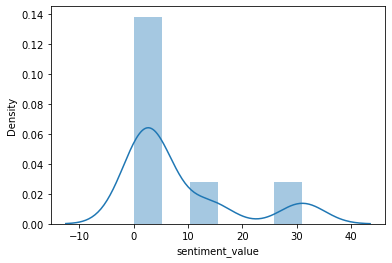

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

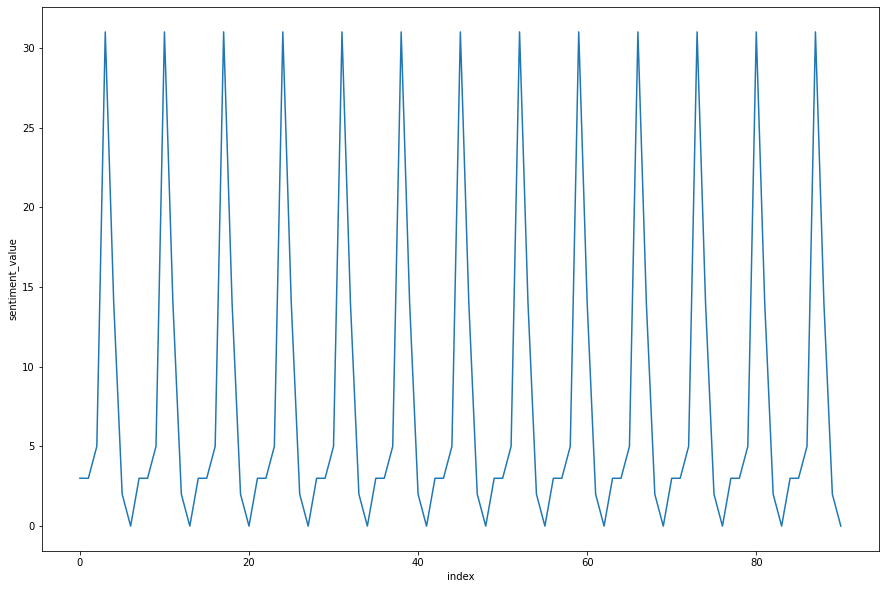

In [35]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

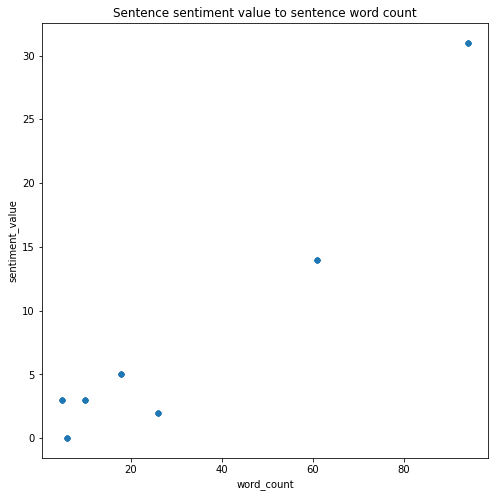

In [36]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')